# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
df=pd.read_csv('imdb_1000.csv')

In [3]:
# show first 5 rows of imdb_df
df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [4]:
# load bikes dataset as pandas dataframe
df2 = pd.read_csv("bikes.csv", sep=";", parse_dates=['Date'], dayfirst=True, index_col='Date')

In [5]:
# show first 3 rows of bikes_df
df2.head(5)

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [6]:
# list columns of imdb_df
for x in df.columns:
    print(x)
df.columns

star_rating
title
content_rating
genre
duration
actors_list


Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [7]:
# what are the datatypes of values in columns
for x in df.columns:
    print(type(x))
    
df.dtypes

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [8]:
# list first 5 movie titles
for x in range(5):
    print(df['title'][x])
df['title'].head()

The Shawshank Redemption
The Godfather
The Godfather: Part II
The Dark Knight
Pulp Fiction


0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [10]:
# show only movie title and genre
res=df[['title','genre']]
print(res.head())

                      title   genre
0  The Shawshank Redemption   Crime
1             The Godfather   Crime
2    The Godfather: Part II   Crime
3           The Dark Knight  Action
4              Pulp Fiction   Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [11]:
# show the type of duration column
df.duration.dtype

dtype('int64')

In [13]:
# show duration values of movies as numpy arrays
df.duration.values[:]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [14]:
# convert all the movie titles to uppercase
def to_uppercase(x):
    return x.upper()

df['title'].apply(to_uppercase).head()


0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

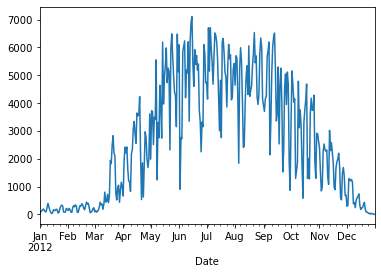

In [17]:
# plot the bikers travelling to Berri1 over the year
#%matplotlib inline
df2['Berri1'].plot()

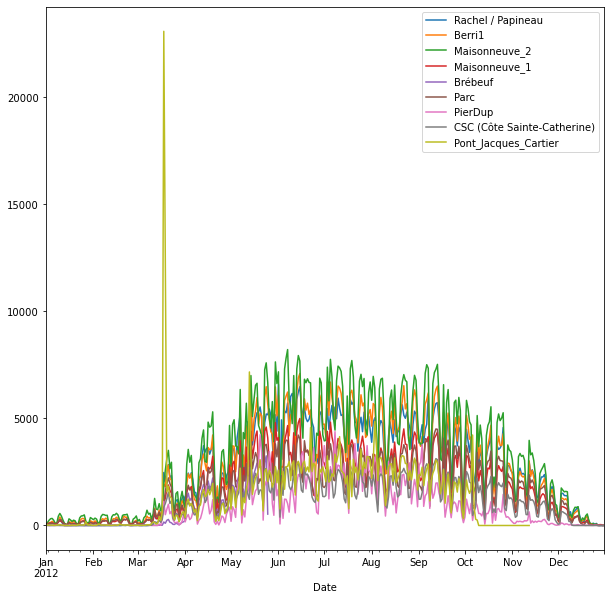

In [22]:
# plot all the columns of bikes_df
df2.plot(figsize=(10,10))

## Value counts

Get count of unique values in a particular column/Series.

In [23]:
# what are the unique genre in imdb_df?
df['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

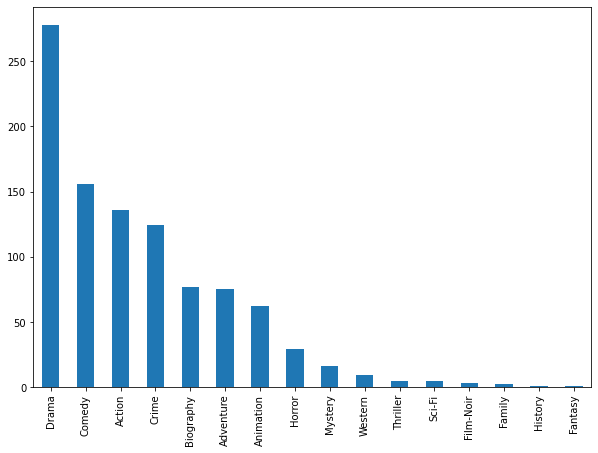

In [26]:
# plotting value counts of unique genres as a bar chart
df['genre'].value_counts().plot.bar(figsize=(10,7))

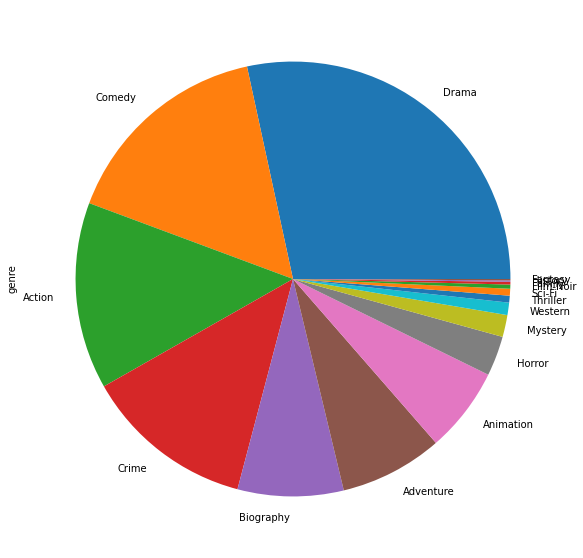

In [25]:
# plotting value counts of unique genres as a pie chart
df['genre'].value_counts().plot.pie(figsize=(10,10))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [27]:
# show index of bikes_df
df2.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [31]:
# get row for date 2012-01-01
x=df2.loc['2012-01-01']
x

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                            5
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              27
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [32]:
# show 11th row of imdb_df using iloc
df.iloc[10]

star_rating                                                     8.8
title             The Lord of the Rings: The Fellowship of the Ring
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [33]:
# select only those movies where genre is adventure
df[df['genre']=='Adventure'].head()

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."


In [34]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
c=(df['star_rating']>8) & (df['duration']>130)
df[c]['genre'].value_counts()

Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Comedy        6
Western       6
Mystery       3
Animation     1
Horror        1
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [35]:
# add a weekday column to bikes_df
df2['weekday']=df2.index.weekday
df2.head()

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,6
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,3


## Deleting an existing column from DataFrame

In [37]:
# remove column 'Unnamed: 1' from bikes_df
df2.drop('Unnamed: 1', axis=1, inplace=True)
df2.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3


## Deleting a row in DataFrame

In [38]:
# remove row no. 1 from bikes_df
df2.drop(df2.index[0]).head()



,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,4


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [39]:
# group imdb_df by movie genres
g=df.groupby('genre')
g.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
687,7.7,Spellbound,UNRATED,Film-Noir,111,"[u'Ingrid Bergman', u'Gregory Peck', u'Michael..."
728,7.6,La piel que habito,R,Thriller,120,"[u'Antonio Banderas', u'Elena Anaya', u'Jan Co..."
848,7.5,The Man Who Knew Too Much,PG,Thriller,120,"[u'James Stewart', u'Doris Day', u'Brenda de B..."


In [40]:
# get crime movies group
g.get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [44]:
# get mean of movie durations for each group
g['duration'].aggregate('mean')

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [47]:
# change duration of all movies in a particular genre to mean duration of the group
def change(x):
    return x.mean()
df['new_duration']=g['duration'].transform(change)
df

,star_rating,title,content_rating,genre,duration,actors_list,new_duration
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",122.298387
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",122.298387
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",122.298387
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",126.485294
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",122.298387
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",107.602564
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",134.840000
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",126.485294
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",102.517241


In [64]:
# drop groups/genres that do not have average movie duration greater than 120.

new_df=g.filter(lambda x:x['duration'].mean() > 120)
new_df

,star_rating,title,content_rating,genre,duration,actors_list,new_duration
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",122.298387
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",122.298387
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",122.298387
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",126.485294
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",122.298387
...,...,...,...,...,...,...,...
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John...",126.539568
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha...",126.539568
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",134.840000
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",126.485294


In [70]:
# group weekday wise bikers count
g2=df2.groupby('weekday')
g2.head(10)

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3
...,...,...,...,...,...,...,...,...,...,...
2012-03-06,0,269,437,192,4.0,170,10,0,11.0,1
2012-03-07,0,438,715,290,7.0,266,28,3,35.0,2
2012-03-08,9,348,530,238,2.0,270,9,6,34.0,3


In [75]:
# get weekday wise biker count
week_count=g2.aggregate(sum)

week_count.index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_count

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Mon,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0
Tue,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0
Wed,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0
Thu,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0
Fri,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0
Sat,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0
Sun,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0


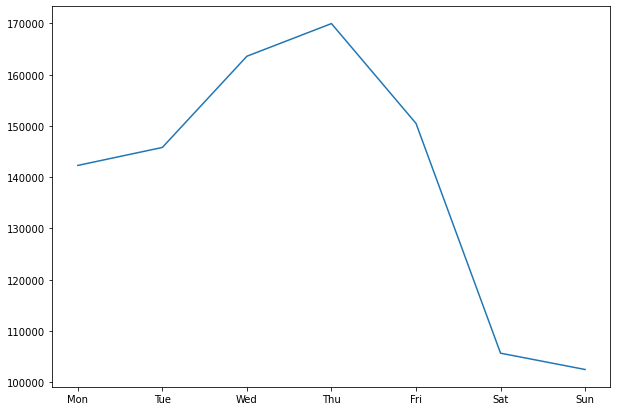

In [81]:
# plot weekday wise biker count for 'Berri1'
week_count['Berri1'].plot(figsize=(10,7))

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)